# BBP-WORKFLOW: Simulation Campaign Analysis

Overview:
* Manual access to bbp-workflow simulation campaign based on Nexus URL
* Quick analysis/visualizations
* Test & development of analysis routines (before putting them into workflow tasks)

Requirements:
* venv with bluepy and bbp-workflow, e.g. to be used in JupyterLab on BB5:
~~~
/gpfs/bbp.cscs.ch/apps/tools/jupyter/create-jupyterlab-venv ~/BbpWorkflowKernel py-bluepy py-bbp-workflow
~~~

In [1]:
from entity_management.simulation import SimulationCampaignConfiguration
from bbp_workflow.utils import xr_from_dict
from bluepy import Circuit
from bluepy import Cell
from bluepy import Simulation
import os.path
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

## Load simulation campaign config from Nexus Knowledge Graph

In [2]:
# Nexus instance and simulation campaign URL
# kg_base = 'https://staging.nexus.ocp.bbp.epfl.ch/v1'
# kg_org = 'bbp_test'
# kg_proj = 'christoph'
# url = 'https://staging.nexus.ocp.bbp.epfl.ch/v1/resources/bbp_test/christoph/_/fba7275b-04ce-4932-908b-6f37a4d1705b'
kg_base = None
kg_org = None
kg_proj = 'somatosensorycortex'
url = 'https://bbp.epfl.ch/nexus/v1/resources/bbp/somatosensorycortex/_/1bb04873-ad1b-4cf0-abf7-5bca6159d956'

# Nexus token, to be retrieved from https://bbp.epfl.ch/nexus/web/ => 'Copy token'
token = 'eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICI5T0R3Z1JSTFVsTTJHbFphVDZjVklnenJsb0lzUWJmbTBDck1icXNjNHQ4In0.eyJleHAiOjE2MzAzNDk0OTEsImlhdCI6MTYzMDMzNjYxMiwiYXV0aF90aW1lIjoxNjMwMzIwNjkxLCJqdGkiOiIwNzMwMTc5YS1jMDA3LTQwNzktOGE0NS02OTMwMjE0OTRjNWIiLCJpc3MiOiJodHRwczovL2JicGF1dGguZXBmbC5jaC9hdXRoL3JlYWxtcy9CQlAiLCJzdWIiOiJmOjBmZGFkZWY3LWIyYjktNDkyYi1hZjQ2LWM2NTQ5MmQ0NTljMjpwb2tvcm55IiwidHlwIjoiQmVhcmVyIiwiYXpwIjoibmV4dXMtd2ViIiwibm9uY2UiOiI2OTI5MTdhNzU0ZWU0NTcyYTEwNjk2MDYyMjM0YzdmYyIsInNlc3Npb25fc3RhdGUiOiI4YjJkOWEwNS1mYWQxLTQyNzYtYmZmMy1jM2UyNmE0YmNjMjYiLCJhY3IiOiIwIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vZGV2Lm5leHVzLm9jcC5iYnAuZXBmbC5jaCIsImh0dHBzOi8vYmJwLmVwZmwuY2giLCJodHRwOi8vZGV2Lm5leHVzLm9jcC5iYnAuZXBmbC5jaCIsImh0dHBzOi8vc3RhZ2luZy5uZXh1cy5vY3AuYmJwLmVwZmwuY2giLCJodHRwczovL2JicC1uZXh1cy5lcGZsLmNoIiwiaHR0cHM6Ly9iYnB0ZWFtLmVwZmwuY2giLCJodHRwOi8vc3RhZ2luZy5uZXh1cy5vY3AuYmJwLmVwZmwuY2giXSwic2NvcGUiOiJvcGVuaWQgcHJvZmlsZSBncm91cHMgZW1haWwiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwibmFtZSI6IkNocmlzdG9waCBQb2tvcm55IiwicHJlZmVycmVkX3VzZXJuYW1lIjoicG9rb3JueSIsImdpdmVuX25hbWUiOiJDaHJpc3RvcGgiLCJmYW1pbHlfbmFtZSI6IlBva29ybnkiLCJlbWFpbCI6ImNocmlzdG9waC5wb2tvcm55QGVwZmwuY2gifQ.aPuuO3g-ob7Gn8VGEoN4r5q2h-xf5EXVoBIdVPEd1lMA7c5QzCJudyg6ycKlLPvPSD5MpFUJwTZCYw-cf4S9hSaJ2tWWNW6zZJXLuBKESZDnbzxPvCXQUF2iIjLQ4aLCvQG4Hb3alPXdYSup0mLL6UMP19hCfgchv98k5TK9-4wRtG0huVwStMAOhgQ1X8yYtBCjR2I00ie4NGm7JVd99QQ4uBwvqUW-e0IJDC2uEz92VmSpnyIoB-lMkNJ1pYg8UoWTUS2mZqWSkmAkjNHFc2gky_RavThwdeI8J9HoUT8-XMVx8a2v7C_D2G5jS3bI1jsjXpfM-UYojOahSmUa9A'

# Settings
stim_name = 'Stimulus_spikeReplay' # Name of stimulus to be plotted (optional)
bin_size = 20 # Time resolution (ms) of firing rate histograms
save_figs = False

# Load campaign and show overview
sim_campaign_cfg = SimulationCampaignConfiguration.from_url(url=url, base=kg_base, org=kg_org, proj=kg_proj, use_auth=token) # retrieve KG entity
config_dict = sim_campaign_cfg.configuration.as_dict(use_auth=token) # get sim campaign config as dict
config = xr_from_dict(config_dict)  # get sim campaign config as Xarray
print(f'Simulation campaign configuration "{sim_campaign_cfg.name}" loaded!')

idx_names = config.to_series().index.names
print(f'Coordinate(s) found: {idx_names}')

Simulation campaign configuration "SSCx-Bio_M-20200805-O1-TunedPerLayerShotNoise_RndDotStim" loaded!
Coordinate(s) found: ['ca', 'shotn_mean_pct_L5E', 'shotn_sd_pct_L5E', 'shotn_mean_pct_L6E', 'shotn_sd_pct_L6E', 'seed']


## Analysis part of code
[which could be launched as a bbp-workflow task]

Using targets with population with a mvd cell file.


Processing 1bb04873-ad1b-4cf0-abf7-5bca6159d956/000...


/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-numpy-1.19.4-upzqna/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
Using targets with population with a mvd cell file.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Processing 1bb04873-ad1b-4cf0-abf7-5bca6159d956/001...


/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-numpy-1.19.4-upzqna/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
Using targets with population with a mvd cell file.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



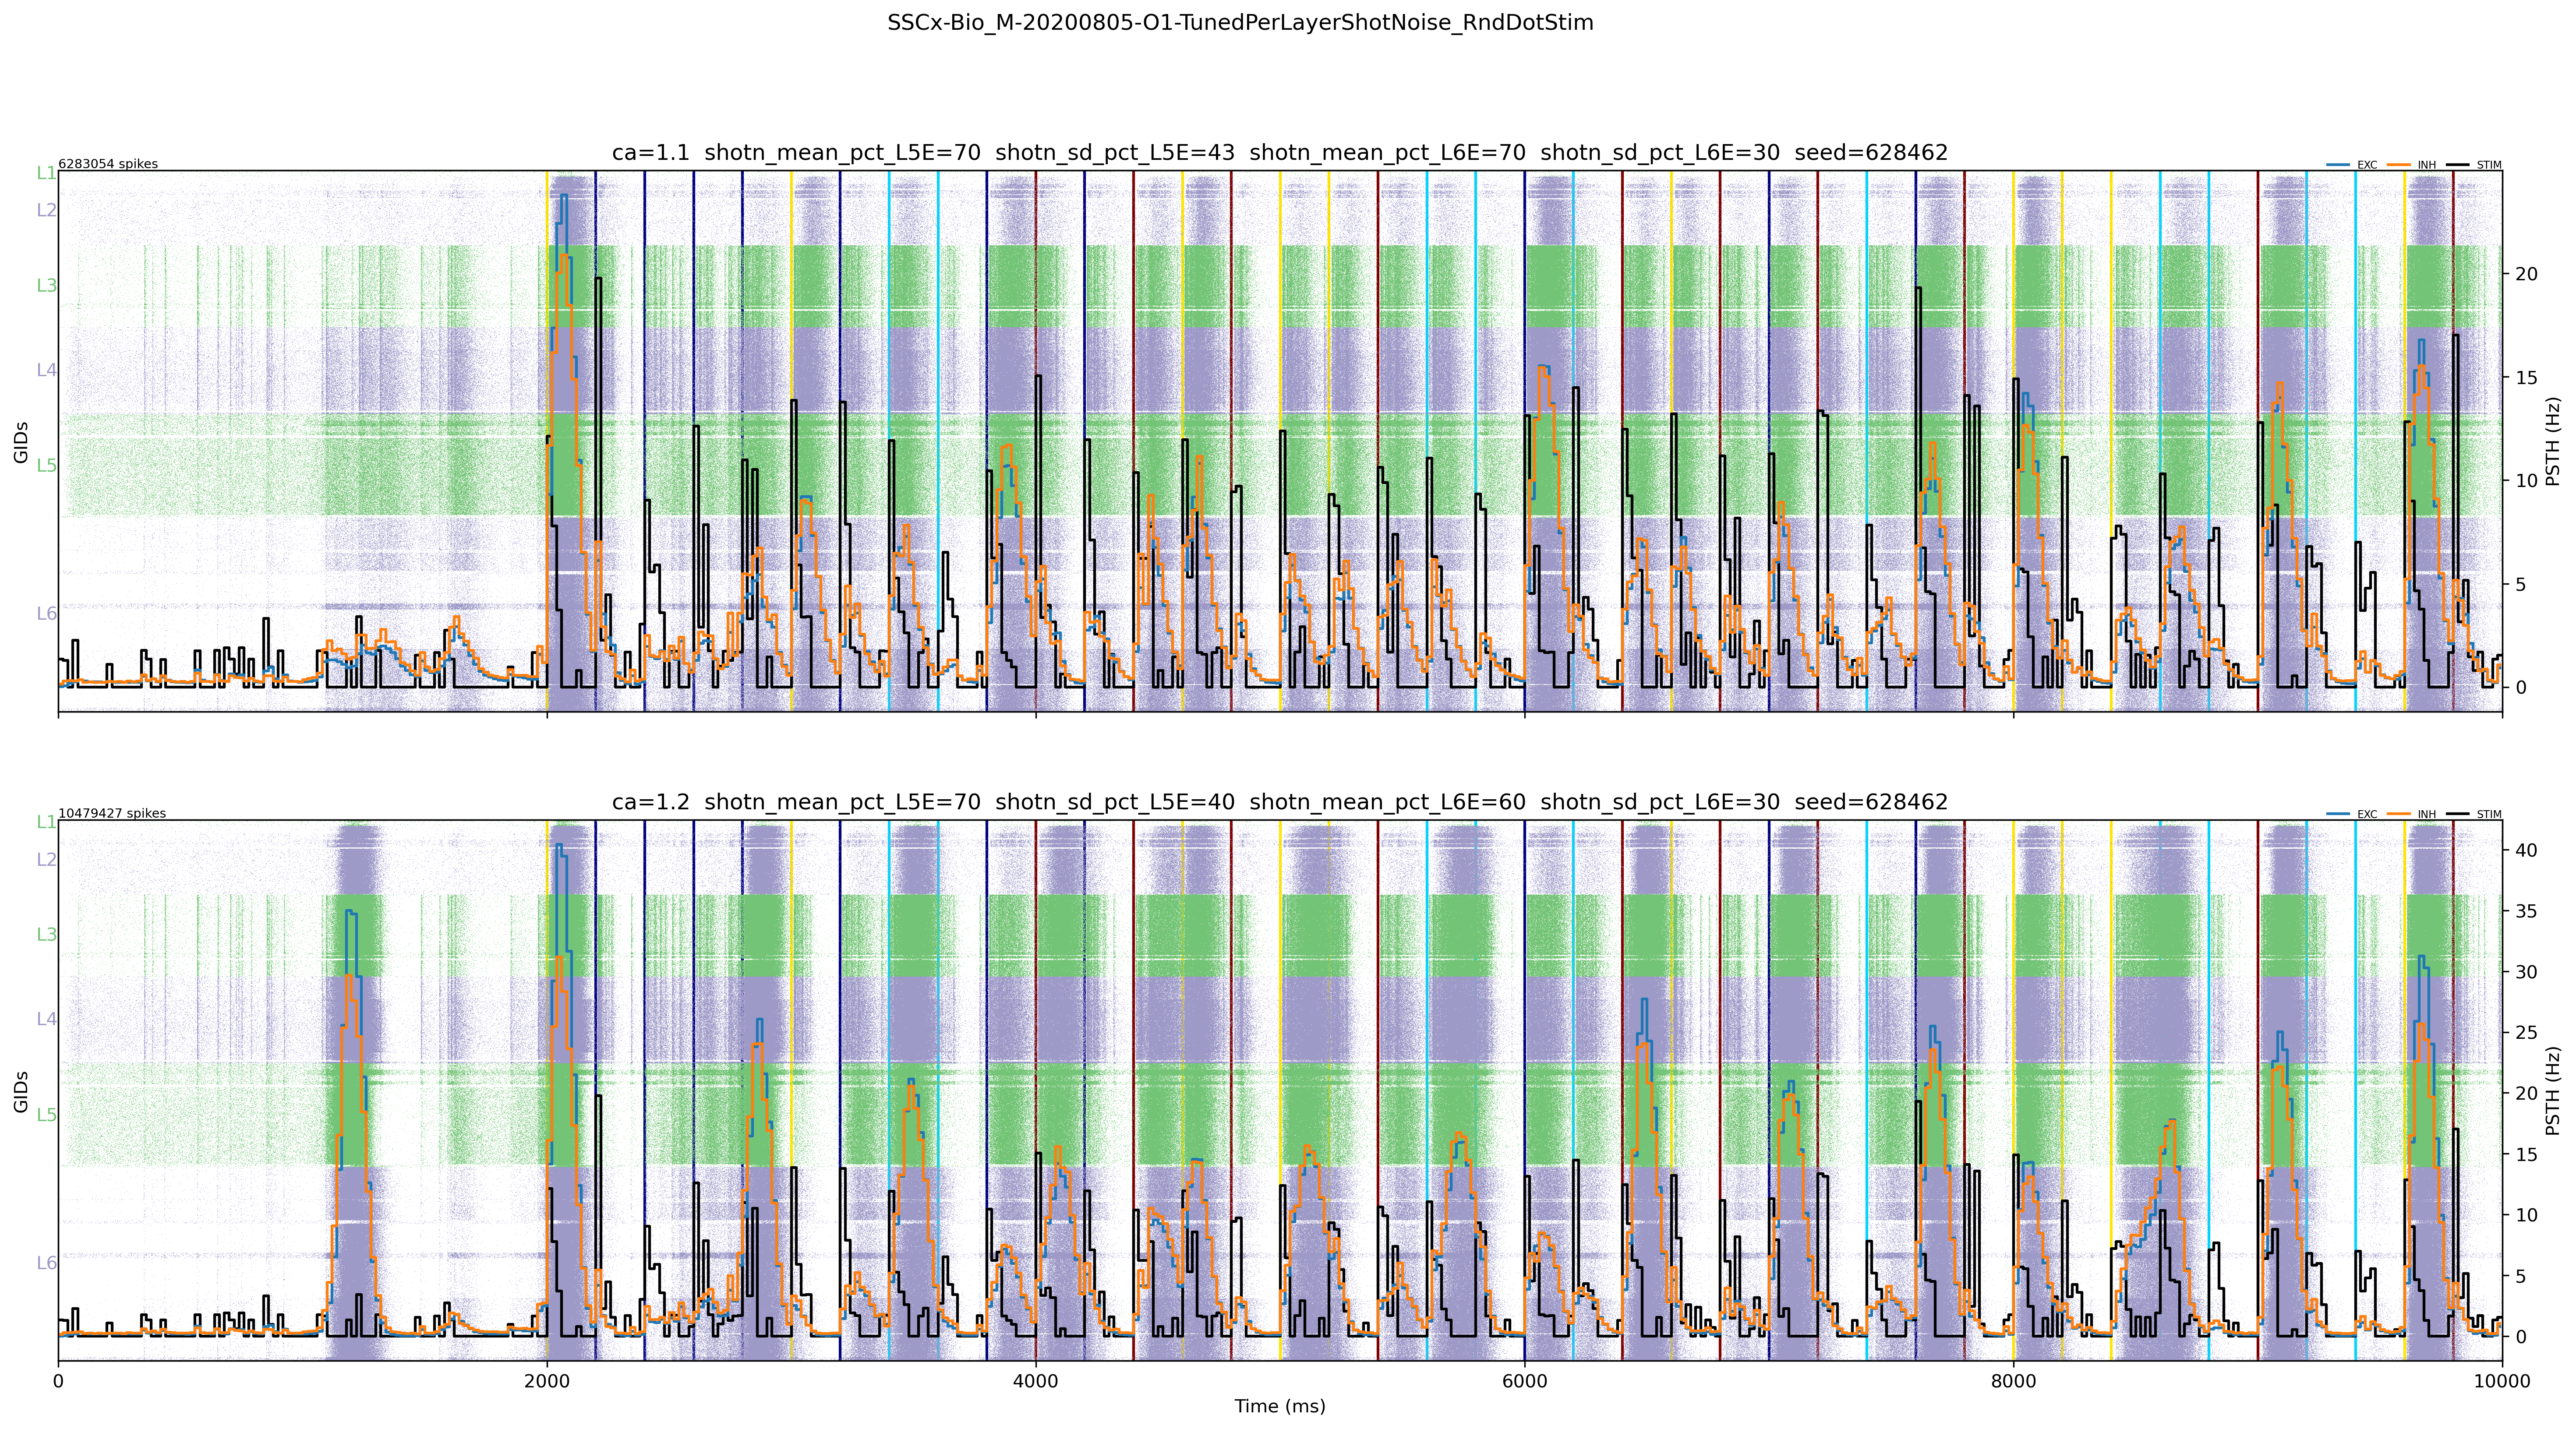

In [3]:
# Spike train visualization

c = Circuit(config.circuit_config)
layers = np.unique(c.cells.get(properties=Cell.LAYER))
lay_colors = np.vstack((plt.cm.Greens(0.5), plt.cm.Purples(0.5)))
lay_colors = np.vstack([lay_colors[np.mod(i, lay_colors.shape[0])] for i in range(len(layers))])
lay_ids = [c.cells.ids({Cell.LAYER: lay}) for lay in layers]
gid_min = min(c.cells.ids())
gid_max = max(c.cells.ids())

plot_ids = np.full(gid_max - gid_min + 1, -1).astype(int)
gid_offset = gid_min
lay_offset = 0
for lidx in range(len(layers)):
    plot_ids[lay_ids[lidx] - gid_offset] = np.arange(len(lay_ids[lidx])) + lay_offset
    lay_offset = lay_offset + len(lay_ids[lidx])

num_rows = config.coords[idx_names[0]].size
num_cols = int(config.size / num_rows)

plt.figure(figsize=(24, 12), dpi=300)
plt.suptitle(sim_campaign_cfg.name)
for idx, (data_idx, data_path) in enumerate(config.to_series().iteritems()):
    if not isinstance(data_idx, tuple):
        data_idx = (data_idx,)  # if index is atomic (just a number) make tuple out of it
    
    label = '  '.join(f'{i[0]}={i[1]}' for i in zip(idx_names, data_idx))
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.title(label)
    plt.yticks([])
    plt.xlim((0, config.sim_duration)) # duration
    plt.ylim((gid_min, gid_max))

    if np.mod(idx, num_cols) == 0:
        plt.ylabel('GIDs\n')
    if np.round(idx / num_cols) >= num_rows - 1:
        plt.xlabel('Time (ms)')
    else:
        plt.gca().set_xticklabels([])    
    
    print('Processing {}...'.format(data_path))
    try:
        sim_path = os.path.join(config.path_prefix, data_path)
        blue_config_file = os.path.join(sim_path, 'BlueConfig')
        
        sim = Simulation(blue_config_file)        
        for lidx, lay in enumerate(layers):
            lay_spikes = sim.spikes.get(gids=lay_ids[lidx])
            plt.plot(lay_spikes.index, plot_ids[lay_spikes.values - gid_offset], ',', markersize=1.0, markeredgecolor='none', color=lay_colors[lidx, :])
            plt.text(0, np.mean(plot_ids[lay_ids[lidx] - gid_offset]), f'L{lay}', color=lay_colors[lidx, :], ha='right', va='center')
        plt.gca().invert_yaxis()
        plt.ylim(plt.ylim()) # Freeze y limits
        plt.text(min(plt.xlim()), min(plt.ylim()), f'{sim.spikes.get().size} spikes', ha='left', va='bottom', fontsize='x-small')
        
        ax_sim = plt.gca()
        ax_rate = plt.gca().twinx()
        sim.plot.firing_rate_histogram(group='Excitatory', sample=None, binsize=bin_size, label='EXC', ax=ax_rate)
        sim.plot.firing_rate_histogram(group='Inhibitory', sample=None, binsize=bin_size, label='INH', ax=ax_rate)
        lgd_ncol = 2
        ax_rate.set_ylabel('PSTH (Hz)')
        ax_rate.set_ylim(ax_rate.get_ylim()) # Freeze y limits

        if stim_name is not None and stim_name in sim.config:
            stim_spike_file = os.path.normpath(os.path.join(sim_path, sim.config[stim_name]['SpikeFile']))
            stim_cfg_file = os.path.normpath(os.path.join(sim_path, os.path.splitext(sim.config[stim_name]['SpikeFile'])[0] + '.json'))
            if os.path.exists(stim_spike_file) and os.path.exists(stim_cfg_file):
                with open(stim_cfg_file, 'r') as f:
                    stim_cfg = json.load(f)
                if 'props' in stim_cfg.keys() and 'time_windows' in stim_cfg['props'] and 'stim_train' in stim_cfg['props']:
                    # Plot stimulus time windows
                    time_windows = stim_cfg['props']['time_windows']
                    stim_train = stim_cfg['props']['stim_train']
                    
                    num_patterns = max(stim_train) + 1
                    num_stimuli = len(stim_train)
                    
                    pat_colors = plt.cm.jet(np.linspace(0, 1, num_patterns))
                    for stim_idx, pat_idx in enumerate(stim_train):
                        ax_sim.plot(np.full(2, time_windows[stim_idx]), ax_sim.get_ylim(), color=pat_colors[pat_idx, :], zorder=0)
                    
                    # Plot firing rate histogram from spike file
                    num_bins = np.round(time_windows[-1] / bin_size).astype(int)
                    bins = np.arange(num_bins + 1) * bin_size
                    
                    stim_spikes = pd.read_csv(stim_spike_file, sep='\t')
                    num_fibers = len(np.unique(stim_spikes.values))
                    
                    stim_psth, _ = np.histogram(stim_spikes.index, bins=bins)
                    stim_psth = (1e3 * stim_psth / bin_size) / num_fibers # Rate (Hz)
                    
                    ax_rate.step(bins, np.hstack((stim_psth[0], stim_psth)), where='pre', color='k', label='STIM', zorder=0)
                    lgd_ncol = lgd_ncol + 1
        
        plt.legend(loc='lower right', ncol=lgd_ncol, fontsize='xx-small', frameon=False, borderpad=0, borderaxespad=0, columnspacing=1, bbox_to_anchor=(1.0, 1.0))
    
    except FileNotFoundError:
        print('Results file not found ... SKIPPING')

if save_figs:
    output_file = os.path.join(config.attrs['path_prefix'], config.name, 'analyses', sim_campaign_cfg.name + '__SpikeOverview.png')
    plt.savefig(output_file)
